In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

#MNIST Database
The database contains 60,000 training images and 10,000 testing images.

Each image is a 28x28 pixel grayscale image of a single digit between 0 and 9.



In [5]:
#Loads the MNIST data using fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [6]:
#Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)

In [8]:
#Dimensions of your training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print("The first image in X_train is a handwritten digit representing the number",y_train[0])

(60000, 784)
(10000, 784)
(60000,)
The first image in X_train is a handwritten digit representing the number 0


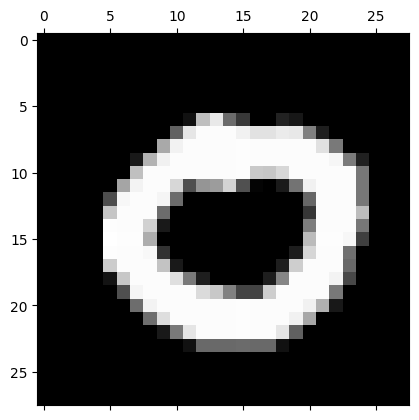

In [9]:
plt.matshow(X_train[0].reshape(28,28), cmap='gray')
plt.show()

#Softmax regression

Softmax regression is designed for multiclass classification problems where each instance belongs to one of multiple classes. In the MNIST dataset, each image belongs to one of 10 digit classes (0 through 9).

The softmax function converts raw prediction scores (logits) into probabilities that sum to 1 across all classes. This probabilistic interpretation is useful for understanding model confidence and making decisions based on predicted probabilities.

Softmax regression extends the concept of logistic regression (binary classification) to multiple classes. It models the relationship between input features (pixel values) and the probability of each class using a linear combination of features, making it simple and interpretable.

While MNIST data may not be perfectly linearly separable, softmax regression can still provide a strong baseline for performance and is often used as a comparison point for more complex models like neural networks.


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000, C=1e10)

In [11]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0, max_iter=1000, multi_class='multinomial')

In [12]:
print(clf.coef_.shape)
print(clf.intercept_)

(10, 784)
[-0.0042279   0.00529454  0.00478578 -0.00866698  0.00257962  0.0318295
 -0.00135109  0.00972853 -0.03251359 -0.00745842]


In [13]:
clf.score(X_test, y_test)

0.9145

#Softmax regression with Stochastic Gradient Descent from scratch
1.   Load and Preprocess the Data
2.   Initialize Parameters
3.   Define the Softmax Function
4.   Compute the Loss Function
5.   Implement Stochastic Gradient Descent
6.   Train the Model
7.   Evaluate the Model






In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
# One-hot encode the labels
one_hot_encoder = OneHotEncoder(sparse=False)
y = one_hot_encoder.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42)

In [20]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Initialize weights and biases
def initialize_parameters(n_features, n_classes):
    W = np.random.randn(n_features, n_classes) * 0.01
    b = np.zeros((1, n_classes))
    return W, b

In [23]:
#Define the Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Prevent overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [24]:
#Compute the Loss Function
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m  # Add epsilon to avoid log(0)
    return loss

In [25]:
#Implement Stochastic Gradient Descent
def sgd_step(X, y, W, b, learning_rate):
    m = X.shape[0]

    # Forward pass
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    # Compute gradients
    dz = y_pred - y
    dW = np.dot(X.T, dz) / m
    db = np.sum(dz, axis=0, keepdims=True) / m

    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db

    return W, b

In [27]:
#Train the Model
def train(X_train, y_train, n_classes, learning_rate=0.01, epochs=100, batch_size=32):
    n_features = X_train.shape[1]
    W, b = initialize_parameters(n_features, n_classes)

    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            W, b = sgd_step(X_batch, y_batch, W, b, learning_rate)

        # Compute loss after each epoch
        z = np.dot(X_train, W) + b
        y_train_pred = softmax(z)
        loss = compute_loss(y_train, y_train_pred)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

    return W, b

In [28]:
#Evaluate the Model
def predict(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)

def evaluate(X, y, W, b):
    y_pred = predict(X, W, b)
    y_true = np.argmax(y, axis=1)
    accuracy = np.mean(y_pred == y_true) * 100
    return accuracy

# Train the model
n_classes = y_train.shape[1]
W, b = train(X_train, y_train, n_classes, learning_rate=0.01, epochs=10, batch_size=32)

# Evaluate the model
accuracy = evaluate(X_test, y_test, W, b)
print(f'Test Accuracy: {accuracy:.2f}%')

Epoch 1/10, Loss: 0.31509128688600785
Epoch 2/10, Loss: 0.2881807416077316
Epoch 3/10, Loss: 0.2756866514330419
Epoch 4/10, Loss: 0.26829316512808715
Epoch 5/10, Loss: 0.2626894886523339
Epoch 6/10, Loss: 0.2588758379041756
Epoch 7/10, Loss: 0.2546636423683367
Epoch 8/10, Loss: 0.25260057040040373
Epoch 9/10, Loss: 0.24989720895644268
Epoch 10/10, Loss: 0.24812047050169575
Test Accuracy: 92.01%
